# E-Commerce Fraud Detection

Summary of this Fraud Detection project
- Data is highly imbalanced
- Interval_after_signup and other time related raw and aggregated features are highly predictive of fraud
- Made actionable operation recommendations/proposal for business

## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [3]:
# !pip install -U imbalanced-learn
# !pip install pandas-profiling

The system cannot find the path specified.
ls: fraudDetection/: No such file or directory


  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.21.2
    Uninstalling scikit-learn-0.21.2:
      Successfully uninstalled scikit-learn-0.21.2


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\haipeng pan\\anaconda3\\lib\\site-packages\\~klearn\\decomposition\\cdnmf_fast.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\users\haipeng pan\anaconda3\python.exe -m pip install --upgrade pip' command.


  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27090 sha256=86ac62380a3f42460723d78e7e8a907cc7c2f1225bd948a2c368ec5f91b1fd41
  Stored in directory: c:\users\haipeng pan\appdata\local\pip\cache\wheels\70\e1\52\5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291996 sha256=77286861933468a992b83d3c7821360b5a419ef7cf59879c203b110d2b1a9ade
  Stored in directory: c:\users\haipeng pan\appdata\local\pip\cache\wheels\16\72\b0\e5be34699908d9ff25dcb3debbb717987b766af61bbddffdfe
Successfully built htmlmin imagehash
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.5.0
    Uninstalling ipywidgets-7.5.0:
      Successfully uninstalled ipywidgets-7.5.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.0
    Uninstalling matplotlib-3.1.0:
      Successfully uninstalled matplotlib-3.1.0


ERROR: phik 0.10.0 has requirement joblib>=0.14.1, but you'll have joblib 0.13.2 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\haipeng pan\\anaconda3\\lib\\site-packages\\~atplotlib\\backends\\_backend_agg.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\users\haipeng pan\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
# ipURL = 'https://github.com/loganlaioffer/fraudDetection/blob/master/IpAddress_to_Country.csv'
# fraudURL = 'https://github.com/loganlaioffer/fraudDetection/blob/master/imbalancedFraudDF.csv'

ipToCountry = pd.read_csv('IpAddress_to_Country.txt')
fraud_data = pd.read_csv('imbalancedFraudDF.txt')

fraud_data.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
3,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
4,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0


In [3]:
# Distribution of the label column
fraud_data['class'].value_counts()

0    136961
1      1415
Name: class, dtype: int64

In [4]:
# pip install pandas-profiling

import pandas_profiling

# Inline summary report without saving report as object
pandas_profiling.ProfileReport(fraud_data)

# simpler version without installing pandas_profiling
# fraud_data.describe().transpose()


C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
# count of NaN in each column
fraud_data.isna().sum()
# fraud_data.isnull().sum(axis = 0)

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

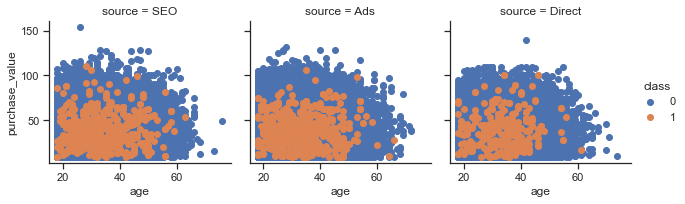

In [26]:
# check patterns of fraud data
import seaborn as sns
from matplotlib import pyplot
sns.set(style="ticks")

g = sns.FacetGrid(fraud_data, col="source",  hue="class")
g = (g.map(pyplot.scatter, "age", "purchase_value").add_legend())

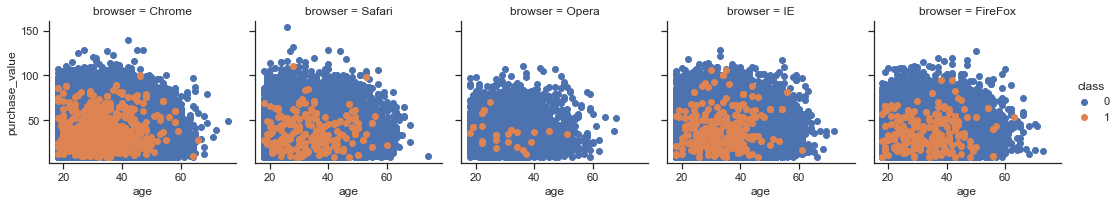

In [23]:
g = sns.FacetGrid(fraud_data, col="browser",  hue="class")
g = (g.map(pyplot.scatter, "age", "purchase_value").add_legend())

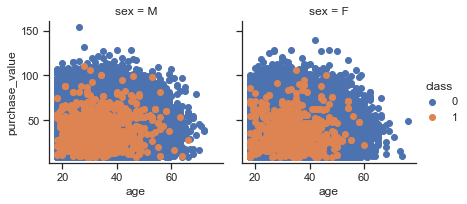

In [25]:
g = sns.FacetGrid(fraud_data, col="sex",  hue="class")
g = (g.map(pyplot.scatter, "age", "purchase_value").add_legend())

In [27]:
# Identify country info based on ip_address
ipToCountry = ipToCountry.sort_values(by=['lower_bound_ip_address'])
ipToCountry.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [28]:

start = time.time()

countries = []
for i in range(len(fraud_data)):
    ip_address = fraud_data.loc[i, 'ip_address'] #number
    tmp = ipToCountry[(ipToCountry['lower_bound_ip_address'] <= ip_address) &
                    (ipToCountry['upper_bound_ip_address'] >= ip_address)]
    if len(tmp) == 1:#found match
        countries.append(tmp['country'].values[0])
    else:#no match
        countries.append('NA')
        
fraud_data['country'] = countries
runtime = time.time() - start 

print("Lookup took", runtime, "seconds.")


Lookup took 142.01908373832703 seconds.


In [29]:
ip_address = fraud_data.loc[6, 'ip_address']
tmp = ipToCountry[(ipToCountry['lower_bound_ip_address'] <= ip_address) &
                    (ipToCountry['upper_bound_ip_address'] >= ip_address)]
print(tmp)

       lower_bound_ip_address  upper_bound_ip_address        country
28203            1.686110e+09              1694498815  United States


## Feature Engineering

In [67]:
print(fraud_data.user_id.nunique())#138376
print(len(fraud_data.index))#138376
# all of the user_id has only 1 transaction

138376
138376


In [30]:
#time related features: can be done before split, as there is no interaction between rows, solely based on other columns of the same row
fraud_data['interval_after_signup'] = (pd.to_datetime(fraud_data['purchase_time']) - pd.to_datetime(
        fraud_data['signup_time'])).dt.total_seconds()

fraud_data['signup_days_of_year'] = pd.DatetimeIndex(fraud_data['signup_time']).dayofyear
fraud_data['signup_seconds_of_day'] = pd.DatetimeIndex(fraud_data['signup_time']).second + 60 * pd.DatetimeIndex(
    fraud_data['signup_time']).minute + 3600 * pd.DatetimeIndex(fraud_data['signup_time']).hour

fraud_data['purchase_days_of_year'] = pd.DatetimeIndex(fraud_data['purchase_time']).dayofyear
fraud_data['purchase_seconds_of_day'] = pd.DatetimeIndex(fraud_data['purchase_time']).second + 60 * pd.DatetimeIndex(
    fraud_data['purchase_time']).minute + 3600 * pd.DatetimeIndex(fraud_data['purchase_time']).hour

fraud_data = fraud_data.drop(['user_id','signup_time','purchase_time'], axis=1)

In [31]:
fraud_data.head()
#note there are NAs in country

,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,interval_after_signup,signup_days_of_year,signup_seconds_of_day,purchase_days_of_year,purchase_seconds_of_day
0,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682.0,55,82549,108,10031
1,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944.0,158,74390,159,5934
2,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NA,492085.0,118,76405,124,50090
3,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4361461.0,202,25792,252,67253
4,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0,Canada,4240931.0,141,21783,190,29114


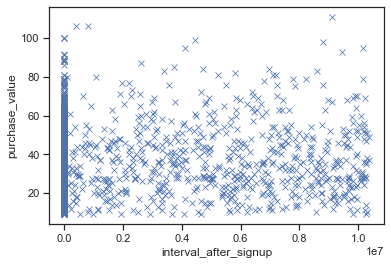

In [65]:
# check fraud over new features
fraud_group = fraud_data[fraud_data['class'] == 1]
sns.scatterplot(fraud_group.interval_after_signup, fraud_group.purchase_value, marker = "x")

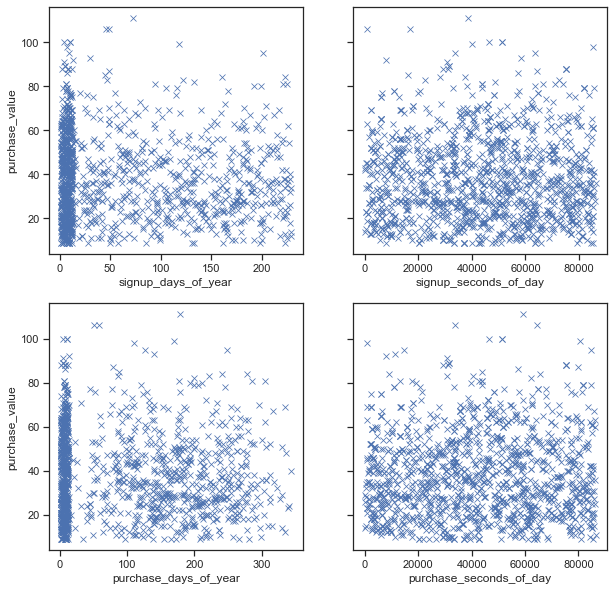

In [74]:
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharey = True)

sns.scatterplot(fraud_group.signup_days_of_year, fraud_group.purchase_value, marker = 'x', ax = axes[0][0])
sns.scatterplot(fraud_group.signup_seconds_of_day, fraud_group.purchase_value, marker = 'x', ax = axes[0][1])
sns.scatterplot(fraud_group.purchase_days_of_year, fraud_group.purchase_value, marker = 'x', ax = axes[1][0])
sns.scatterplot(fraud_group.purchase_seconds_of_day, fraud_group.purchase_value, marker = 'x', ax = axes[1][1])

In [76]:
y = fraud_data['class']
X = fraud_data.drop(['class'], axis=1)

#split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)

X_train.shape: (110700, 13)
y_train.shape: (110700,)


In [77]:
X_train['country'].value_counts(ascending=True)
#drawback: collision in the same bucket(no differentiation for these countries)

Madagascar                            1
Bonaire; Sint Eustatius; Saba         1
Cape Verde                            1
British Indian Ocean Territory        1
Bermuda                               1
                                  ...  
United Kingdom                     3253
Japan                              5251
China                              8876
NA                                16275
United States                     42348
Name: country, Length: 177, dtype: int64

In [78]:
X_train.head()

,purchase_value,device_id,source,browser,sex,age,ip_address,country,interval_after_signup,signup_days_of_year,signup_seconds_of_day,purchase_days_of_year,purchase_seconds_of_day
29343,12,OULPAZAFRFPXP,Ads,Chrome,M,42,3.690922e+09,Korea Republic of,3499664.0,183,67384,224,24648
12190,10,AIIWMFEYQQIEB,Ads,Opera,M,29,1.686759e+09,United States,6766039.0,5,78146,84,18585
19388,34,VUVETBUPCIWJE,Direct,Chrome,M,53,4.138429e+09,NA,5870515.0,197,81354,265,76669
89104,48,QCFULAJOYKFUU,Ads,Chrome,M,29,9.617337e+07,France,2145618.0,160,30920,185,16538
82082,44,IHRWLMIJMEEEU,Ads,FireFox,M,24,1.936025e+09,China,7079059.0,111,71897,193,66156


Convert categorical features with high cadinality to numericals

In [79]:
#converting needs to be done after split
X_train = pd.get_dummies(X_train, columns=['source', 'browser'])#need to drop ['source', 'browser']? no, auto dropped by get_dummies 
X_train['sex'] = (X_train.sex == 'M').astype(int)

# the more a device is shared, the more suspicious
X_train_device_id_mapping = X_train.device_id.value_counts(dropna=False)
X_train['n_dev_shared'] = X_train.device_id.map(X_train_device_id_mapping)# number of times device_id occurred in train data

# the more a ip is shared, the more suspicious
X_train_ip_address_mapping = X_train.ip_address.value_counts(dropna=False)
X_train['n_ip_shared'] = X_train.ip_address.map(X_train_ip_address_mapping)

# the less visit from a country, the more suspicious
X_train_country_mapping = X_train.country.value_counts(dropna=False)
X_train['n_country_shared'] = X_train.country.map(X_train_country_mapping)#lots of NAs in country column, #without dropna=False will produce nan in this col

In [80]:
X_train = X_train.drop(['device_id','ip_address','country'], axis=1)

In [81]:
##########################
X_test = pd.get_dummies(X_test, columns=['source', 'browser'])
X_test['sex'] = (X_test.sex == 'M').astype(int)

# the more a device is shared, the more suspicious
X_test['n_dev_shared'] = X_test.device_id.map(X_test.device_id.value_counts(dropna=False))

# the more a ip is shared, the more suspicious
X_test['n_ip_shared'] = X_test.ip_address.map(X_test.ip_address.value_counts(dropna=False))

# the less visit from a country, the more suspicious
X_test['n_country_shared'] = X_test.country.map(X_test.country.value_counts(dropna=False))

X_test = X_test.drop(['device_id','ip_address','country'], axis=1)

In [82]:
X_train.head()

,purchase_value,sex,age,interval_after_signup,signup_days_of_year,signup_seconds_of_day,purchase_days_of_year,purchase_seconds_of_day,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,n_dev_shared,n_ip_shared,n_country_shared
29343,12,1,42,3499664.0,183,67384,224,24648,1,0,0,1,0,0,0,0,1,1,3075
12190,10,1,29,6766039.0,5,78146,84,18585,1,0,0,0,0,0,1,0,1,1,42348
19388,34,1,53,5870515.0,197,81354,265,76669,0,1,0,1,0,0,0,0,1,1,16275
89104,48,1,29,2145618.0,160,30920,185,16538,1,0,0,1,0,0,0,0,1,1,2322
82082,44,1,24,7079059.0,111,71897,193,66156,1,0,0,0,1,0,0,0,1,1,8876


Q: What is the difference between normalization and standardization?

In [83]:
# # normalize (min-max) to [0,1], standardize(StandardScaler) to normal, mu=0,var = 1 can < 0, so we do normalize here

# needs to be brought to the same scale for models like LR with regularization(that are not tree based)

#Compute the train minimum and maximum to be used for later scaling:
scaler = preprocessing.MinMaxScaler().fit(X_train[['n_dev_shared', 'n_ip_shared', 'n_country_shared']]) 
#print(scaler.data_max_)

#transform the training data and use them for the model training
X_train[['n_dev_shared', 'n_ip_shared', 'n_country_shared']] = scaler.transform(X_train[['n_dev_shared', 'n_ip_shared', 'n_country_shared']])

#before the prediction of the test data, apply the same scaler obtained from above on X_test, not fitting a brandnew scaler on test
X_test[['n_dev_shared', 'n_ip_shared', 'n_country_shared']] = scaler.transform(X_test[['n_dev_shared', 'n_ip_shared', 'n_country_shared']])

In [84]:
X_train.n_dev_shared.value_counts(dropna=False)

0.0    105427
0.2      4774
0.4       324
0.6       124
0.8        45
1.0         6
Name: n_dev_shared, dtype: int64

In [85]:
X_test.n_dev_shared.value_counts(dropna=False)

0.0    27330
0.2      334
0.4       12
Name: n_dev_shared, dtype: int64

Simple LogisticRegression model

In [86]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# predict on test
y_pred=logreg.predict(X_test)

In [87]:
cm = metrics.confusion_matrix(y_test, y_pred)
cmDF = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
print(cmDF)

        pred_0  pred_1
true_0   27389       0
true_1     287       0


Simple RF model

In [88]:
classifier_RF = RandomForestClassifier(random_state=0)

classifier_RF.fit(X_train, y_train)

# predict class labels 0/1 for the test set
predicted = classifier_RF.predict(X_test)

# generate class probabilities
probs = classifier_RF.predict_proba(X_test)

# generate evaluation metrics
print("%s: %r" % ("accuracy_score is: ", accuracy_score(y_test, predicted)))
print("%s: %r" % ("roc_auc_score is: ", roc_auc_score(y_test, probs[:, 1])))
print("%s: %r" % ("f1_score is: ", f1_score(y_test, predicted )))#string to int

print ("confusion_matrix is: ")
cm = confusion_matrix(y_test, predicted)
cmDF = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
print(cmDF)
print('recall =',float(cm[1,1])/(cm[1,0]+cm[1,1]))
print('precision =', float(cm[1,1])/(cm[1,1] + cm[0,1]))#1.0

accuracy_score is: : 0.9948692007515537
roc_auc_score is: : 0.7801672204169557
f1_score is: : 0.6712962962962962
confusion_matrix is: 
        pred_0  pred_1
true_0   27389       0
true_1     142     145
recall = 0.5052264808362369
precision = 1.0


SMOTE sampling

In [89]:
smote = SMOTE(random_state=1)
x_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

unique, counts = np.unique(y_train_sm, return_counts=True)

print(np.asarray((unique, counts)).T)

[[     0 109572]
 [     1 109572]]


In [90]:
#RF on smoted training data
classifier_RF_sm = RandomForestClassifier(random_state=0)

classifier_RF_sm.fit(x_train_sm, y_train_sm)

# predict class labels for the test set
predicted_sm = classifier_RF_sm.predict(X_test)

# generate class probabilities
probs_sm = classifier_RF_sm.predict_proba(X_test)


# generate evaluation metrics
print("%s: %r" % ("accuracy_score_sm is: ", accuracy_score(y_test, predicted_sm)))
print("%s: %r" % ("roc_auc_score_sm is: ", roc_auc_score(y_test, probs_sm[:, 1])))
print("%s: %r" % ("f1_score_sm is: ", f1_score(y_test, predicted_sm )))#string to int

print ("confusion_matrix_sm is: ")
cm_sm = confusion_matrix(y_test, predicted_sm)
cmDF = pd.DataFrame(cm_sm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
print(cmDF)
print('recall or sens_sm =',float(cm_sm[1,1])/(cm_sm[1,0]+cm_sm[1,1]))
print('precision_sm =', float(cm_sm[1,1])/(cm_sm[1,1] + cm_sm[0,1]))

accuracy_score_sm is: : 0.9948330683624801
roc_auc_score_sm is: : 0.7707227640283371
f1_score_sm is: : 0.6697459584295612
confusion_matrix_sm is: 
        pred_0  pred_1
true_0   27388       1
true_1     142     145
recall or sens_sm = 0.5052264808362369
precision_sm = 0.9931506849315068


# Parameter tuning by GridSearchCV

Eval metrics for GridSearchCV over all fits upon combination of parameters and cv

In [91]:
# Eval metrics to be calculated for each combination of parameters and cv, they are all calculated(by scoring), but not necessarily used to pick the optimal(by refit)
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score, pos_label=1)
    
}

In [97]:
def grid_search_wrapper(model, parameters, refit_score='f1_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization(refit on the best model according to refit_score)
    prints classifier performance metrics
    """

    grid_search = GridSearchCV(model, parameters, scoring=scorers, refit=refit_score,
                           cv=5, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # make the predictions
    y_pred = grid_search.predict(X_test)
    y_prob = grid_search.predict_proba(X_test)[:, 1]
    
    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    cm = confusion_matrix(y_test, y_pred)
    cmDF = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
    print(cmDF)
    
    print("\t%s: %r" % ("roc_auc_score is: ", roc_auc_score(y_test, y_prob)))
    print("\t%s: %r" % ("f1_score is: ", f1_score(y_test, y_pred)))#string to int

    print('recall = ', float(cm[1,1]) / (cm[1,0] + cm[1,1]))
    print('precision = ', float(cm[1,1]) / (cm[1, 1] + cm[0,1]))

    return grid_search



Optimizing on f1_score on LR

In [99]:
# C: inverse of regularization strength, smaller values specify stronger regularization
LRGrid = {"C" : [0.01, 0.1, 1, 10, 100], "penalty":["l1","l2"]}# l1 lasso l2 ridge
logRegModel = LogisticRegression(random_state=0)

grid_search_LR_f1 = grid_search_wrapper(logRegModel, LRGrid, refit_score='f1_score')

Best params for f1_score
{'C': 0.01, 'penalty': 'l2'}

Confusion matrix of Random Forest optimized for f1_score on the test data:
        pred_0  pred_1
true_0   27389       0
true_1     287       0
	roc_auc_score is: : 0.7505893601833846
	f1_score is: : 0.0
recall =  0.0
precision =  nan


C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


Optimizing on f1_score on RF

In [104]:
parameters = {        
'max_depth': [None, 5, 10, 15],
'n_estimators' :  [20, 50, 80],
'class_weight' : [{0: 1, 1: w} for w in [0.1, 0.2, 1]]
}

clf = RandomForestClassifier(random_state=1)

In [105]:
grid_search_rf_f1 = grid_search_wrapper(clf, parameters, refit_score='f1_score')

Best params for f1_score
{'class_weight': {0: 1, 1: 0.1}, 'max_depth': None, 'n_estimators': 20}

Confusion matrix of Random Forest optimized for f1_score on the test data:
        pred_0  pred_1
true_0   27389       0
true_1     142     145
	roc_auc_score is: : 0.7649386952186991
	f1_score is: : 0.6712962962962962
recall =  0.5052264808362369
precision =  1.0


In [106]:
best_rf_model_f1 = grid_search_rf_f1.best_estimator_
best_rf_model_f1

RandomForestClassifier(class_weight={0: 1, 1: 0.1}, n_estimators=20,
                       random_state=1)

In [108]:
results_f1 = pd.DataFrame(grid_search_rf_f1.cv_results_)
results_sortf1 = results_f1.sort_values(by='mean_test_f1_score', ascending=False)
results_sortf1[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_f1_score', 'mean_train_precision_score', 'mean_train_recall_score', 'mean_train_f1_score','param_max_depth', 'param_class_weight', 'param_n_estimators']].round(3).head()




,mean_test_precision_score,mean_test_recall_score,mean_test_f1_score,mean_train_precision_score,mean_train_recall_score,mean_train_f1_score,param_max_depth,param_class_weight,param_n_estimators
0,1.0,0.527,0.689,1.0,0.929,0.963,None,"{0: 1, 1: 0.1}",20
1,1.0,0.527,0.689,1.0,0.985,0.993,None,"{0: 1, 1: 0.1}",50
20,1.0,0.527,0.689,1.0,0.527,0.691,10,"{0: 1, 1: 0.2}",80
21,1.0,0.527,0.689,1.0,0.581,0.735,15,"{0: 1, 1: 0.2}",20
22,1.0,0.527,0.689,1.0,0.564,0.721,15,"{0: 1, 1: 0.2}",50


In [109]:
#Var Importance, make a guess?
pd.DataFrame(best_rf_model_f1.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)




,importance
interval_after_signup,0.415786
purchase_days_of_year,0.119013
purchase_seconds_of_day,0.083207
signup_seconds_of_day,0.076655
signup_days_of_year,0.065032
n_ip_shared,0.049874
purchase_value,0.043856
age,0.041674
n_dev_shared,0.030574
n_country_shared,0.027279


Optimizing recall_score on RF

In [110]:
grid_search_rf_recall = grid_search_wrapper(clf, parameters, refit_score='recall_score')

Best params for recall_score
{'class_weight': {0: 1, 1: 0.1}, 'max_depth': None, 'n_estimators': 20}

Confusion matrix of Random Forest optimized for recall_score on the test data:
        pred_0  pred_1
true_0   27389       0
true_1     142     145
	roc_auc_score is: : 0.7649386952186991
	f1_score is: : 0.6712962962962962
recall =  0.5052264808362369
precision =  1.0


In [111]:
best_RF_model_recall = grid_search_rf_recall.best_estimator_
best_RF_model_recall

RandomForestClassifier(class_weight={0: 1, 1: 0.1}, n_estimators=20,
                       random_state=1)

Optimizing on recall on XGBoost

In [122]:
from xgboost import XGBClassifier
xgb_parameters = {        
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 2],
        'subsample': [0.6, 1.0],
        'colsample_bytree': [0.6, 1.0],
        'max_depth': [3, 4, 5]
}

xgb = XGBClassifier(learning_rate=0.01, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=4)

In [123]:
grid_search_xgb_recall = grid_search_wrapper(xgb, xgb_parameters, refit_score='recall_score')

[22:37:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best params for recall_score
{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6}

Confusion matrix of Random Forest optimized for recall_score on the test data:
        pred_0  pred_1
true_0   27389       0
true_1     142     145
	roc_auc_score is: : 0.7956465520695953
	f1_score is: : 0.6712962962962962
recall =  0.5052264808362369
precision =  1.0


In [124]:
best_xgb_recall = grid_search_xgb_recall.best_estimator_
best_xgb_recall

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              silent=True, subsample=0.6, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [112]:
# predict class labels for the test set
predictedBest_recall = best_RF_model_recall.predict(X_test)

# generate class probabilities
probsBest_recall = best_RF_model_recall.predict_proba(X_test)

results_recall = pd.DataFrame(grid_search_rf_recall.cv_results_)# recall score is different from above, as above is metric on test data, this is performance on cv data
results_sortrecall = results_recall.sort_values(by='mean_test_recall_score', ascending=False)
results_sortrecall[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_f1_score', 'mean_train_precision_score', 'mean_train_recall_score', 'mean_train_f1_score','param_max_depth', 'param_class_weight', 'param_n_estimators']].round(3).head()
#recall is worse than default rf?? no this is on test, but train recall is better

,mean_test_precision_score,mean_test_recall_score,mean_test_f1_score,mean_train_precision_score,mean_train_recall_score,mean_train_f1_score,param_max_depth,param_class_weight,param_n_estimators
0,1.0,0.527,0.689,1.0,0.929,0.963,None,"{0: 1, 1: 0.1}",20
1,1.0,0.527,0.689,1.0,0.985,0.993,None,"{0: 1, 1: 0.1}",50
20,1.0,0.527,0.689,1.0,0.527,0.691,10,"{0: 1, 1: 0.2}",80
21,1.0,0.527,0.689,1.0,0.581,0.735,15,"{0: 1, 1: 0.2}",20
22,1.0,0.527,0.689,1.0,0.564,0.721,15,"{0: 1, 1: 0.2}",50


# Ad-hoc

In [113]:
trainDF = pd.concat([X_train, y_train], axis=1)
pd.crosstab(trainDF["n_dev_shared"],trainDF["class"])
#the larger n_dev_shared, the higher rate of fraud

class,0,1
n_dev_shared,,
0.0,104966,461
0.2,4403,371
0.4,152,172
0.6,37,87
0.8,13,32
1.0,1,5


In [115]:
fraud_data.groupby("class")[['interval_after_signup']].mean()
#interval_after_signup on frauds are significantly lower compared to legit ones

,interval_after_signup
class,
0,5.191179e+06
1,2.570226e+06


In [116]:
fraud_data.groupby("class")[['interval_after_signup']].median()#1
#more than half of fraud happened 1s after signed up

,interval_after_signup
class,
0,5194911.0
1,1.0


In [117]:
fraud_data[fraud_data['class'] == 1].head(100)

,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,interval_after_signup,signup_days_of_year,signup_seconds_of_day,purchase_days_of_year,purchase_seconds_of_day
136961,24,VLHGCDPFCICDA,SEO,Chrome,F,33,3.432126e+09,1,United States,3327952.0,218,80113,257,38465
136962,14,YLUQSRNYYIPXU,Ads,Chrome,M,40,3.905319e+09,1,NA,1.0,12,4207,12,4208
136963,63,ABUBCQDATQMQH,Ads,FireFox,F,46,5.505670e+08,1,United States,7640070.0,49,40723,137,77593
136964,34,QHEODGCAVJKIQ,SEO,Chrome,M,37,9.408096e+08,1,United States,1.0,12,77710,12,77711
136965,76,DAKVYHKIEYRBH,SEO,Chrome,F,48,6.361041e+08,1,Hungary,1.0,10,48421,10,48422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137056,21,AIGPGDVRDKOKT,SEO,FireFox,F,45,3.058136e+09,1,India,1.0,2,69762,2,69763
137057,52,PQGKGQACIARBV,Ads,Chrome,F,36,7.203338e+08,1,China,1.0,9,77018,9,77019
137058,54,XHZBVWFWHSGTQ,SEO,FireFox,M,50,2.249217e+09,1,United States,1.0,1,32483,1,32484
137059,10,WETYPHOQVLWMK,Ads,FireFox,M,36,2.293333e+09,1,United States,1.0,7,63914,7,63915


In [122]:
t = (10 * probsBest_recall[:, 1]).astype(int)
unique, counts = np.unique(t, return_counts=True)

print(np.asarray((unique, counts)).T)


# Recommended:
# green: 0 - 1 pass
# yellow: 2 - 8 need manual investigation
# red: 9 - 10 decline

[[    0 27238]
 [    1   276]
 [    2    17]
 [    7     2]
 [    8    24]
 [    9    61]
 [   10    58]]
